# Political Competition Model: Incumbent's Optimization Problem

Import necessary packages for symbolic mathematics and visualization.

In [1]:
# Import all functions from SymPy for symbolic mathematics
from sympy import *
# Import matplotlib for plotting (if needed later)
import matplotlib.pyplot as plt
# Set SymPy to display mathematical expressions in pretty format
init_printing()

# Bertocchi et al. (AEJ Policy 2020): Incumbent Politician's Choice Problem

This notebook analyzes the optimization problem of an incumbent politician based on the theoretical framework from Bertocchi et al. (2020). We focus on how politicians choose their policy platforms to maximize their expected utility from winning elections.

## Model Overview

We analyze the choice problem of one politician while treating other model components as given:
1. **Given**: Probability functions for winning elections (derived from voter behavior)
2. **Given**: Political rival's policy choices  
3. **To solve**: Incumbent's optimal policy platform choice

This approach allows us to understand strategic policy-making in electoral competition.

## Model Setup: Politician's Decision Variables

Each political candidate $\zeta \in \{I,C\}$ (Incumbent, Challenger) chooses a policy platform with three components:

$$q_{\zeta} = (\tau_{\zeta}, e_{\zeta}, R_{\zeta})$$

where:
- $\tau_{\zeta} \in [0,1]$: tax rate on wealth
- $e_{\zeta} \geq 0$: public expenditure on education  
- $R_{\zeta} \geq 0$: electoral rent (other public expenditure benefiting the politician)

**Government Budget Constraint:**
$$ e_{\zeta} + R_{\zeta} = [\tau_{\zeta} - D(\tau_{\zeta})]\omega $$

where:
- $\omega > 0$: total wealth in the jurisdiction
- $D(\tau_{\zeta}) = \frac{1}{2}\tau_{\zeta}^2$: deadweight cost of taxation (increasing and convex)
- Net tax revenue = $(\tau_{\zeta} - \frac{1}{2}\tau_{\zeta}^2)\omega$

## Incumbent's Optimization Problem

The incumbent politician (I) maximizes expected electoral rent:

$$\max_{\tau_I, e_I, R_I} \quad p_I(q_I, q_C) \cdot R_I$$

subject to the government budget constraint:
$$(\tau_I - \frac{1}{2}\tau_I^2)\omega = e_I + R_I$$

**Intuition**: The incumbent trades off higher electoral rent ($R_I$) against lower winning probability (since higher $R_I$ means less spending on voter-preferred policies).

## Winning Probability Function

From the voter model, the incumbent's winning probability is:

$$p_I(q_I, q_C) = \frac{1}{2} + \phi + (\tau_C-\tau_I)\omega + (e_I-e_C) \sigma^T$$

where:
- $\phi$: incumbency advantage
- $\sigma^T = \sigma\lambda^y + (1-\sigma)\lambda^o$: weighted average marginal benefit from education
- $\lambda^y, \lambda^o$: marginal benefits from education for young and old voters
- $\sigma \in [0,1]$: effective weight of young voters (depends on demographics and voting costs)

**Key insight**: Incumbent wins more votes by having lower taxes or higher education spending relative to challenger.

## Complete Optimization Problem

Substituting the winning probability function:

$$\max_{\tau_I, e_I, R_I} \quad \left( \frac{1}{2} + \phi + (\tau_C-\tau_I)\omega + (e_I-e_C)\sigma^T \right) \cdot R_I$$

subject to:
$$(\tau_I - \frac{1}{2}\tau_I^2)\omega = e_I + R_I$$

## Symbolic Solution Using SymPy

### Step 1: Declare Symbolic Variables

We define all variables as SymPy symbols for symbolic computation.

In [2]:
# Policy variables for incumbent (I) and challenger (C)
tau_I, tau_C = symbols('tau_I tau_C', real=True, positive=True)
e_I, e_C = symbols('e_I e_C', real=True, positive=True) 
R_I = symbols('R_I', real=True, positive=True)

# Model parameters
phi = symbols('phi', real=True)  # incumbency advantage
omega = symbols('omega', real=True, positive=True)  # total wealth
sigma_T = symbols('sigma^T', real=True, positive=True)  # weighted voter preference

# Lagrange multiplier
lam = symbols('lambda', real=True)

print("Symbolic variables defined successfully")

Symbolic variables defined successfully


In [3]:
# Display the weighted voter preference parameter
sigma_T

### Step 2: Define the Objective Function

Winning probability p_I =


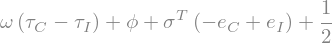


Objective function =


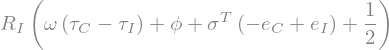

In [4]:
# Define incumbent's winning probability
p_I = Rational(1,2) + phi + (tau_C - tau_I)*omega + (e_I - e_C)*sigma_T

print("Winning probability p_I =")
display(p_I)

# Define incumbent's objective function (expected electoral rent)
objective = p_I * R_I

print("\nObjective function =")
display(objective)

### Step 3: Set up the Lagrangian

We use the method of Lagrange multipliers to incorporate the budget constraint.

Lagrangian =


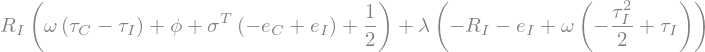

In [5]:
# Government budget constraint: net tax revenue = total spending
budget_constraint = (tau_I - Rational(1,2)*tau_I**2)*omega - e_I - R_I

# Lagrangian: objective + λ × constraint
L = objective + lam * budget_constraint

print("Lagrangian =")
display(L)

### Step 4: Solve First-Order Conditions

The first-order conditions are:
- $\frac{\partial L}{\partial \tau_I} = 0$
- $\frac{\partial L}{\partial e_I} = 0$  
- $\frac{\partial L}{\partial R_I} = 0$
- $\frac{\partial L}{\partial \lambda} = 0$ (budget constraint)

First-order conditions:
∂L/∂τ_I = -R_I*omega + lambda*omega*(1 - tau_I)
∂L/∂e_I = R_I*sigma^T - lambda
∂L/∂R_I = -lambda + omega*(tau_C - tau_I) + phi + sigma^T*(-e_C + e_I) + 1/2
∂L/∂λ = -R_I - e_I + omega*(-tau_I**2/2 + tau_I)

Solving the system...


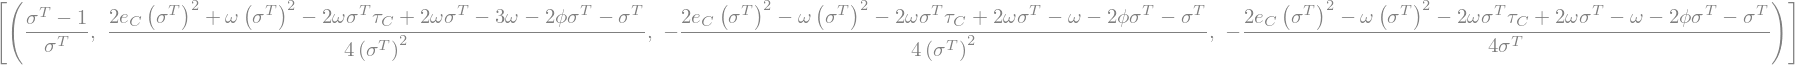

In [6]:
# Compute first-order conditions
foc_tau = diff(L, tau_I)
foc_e = diff(L, e_I) 
foc_R = diff(L, R_I)
foc_lam = diff(L, lam)

print("First-order conditions:")
print("∂L/∂τ_I =", foc_tau)
print("∂L/∂e_I =", foc_e)  
print("∂L/∂R_I =", foc_R)
print("∂L/∂λ =", foc_lam)

# Solve the system of equations
print("\nSolving the system...")
solutions = solve([foc_tau, foc_e, foc_R, foc_lam], [tau_I, e_I, R_I, lam])
solutions

Optimal tax rate:


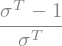

In [8]:
# Extract optimal tax rate
tau_I_optimal = solutions[0][0]
print("Optimal tax rate:")
display(tau_I_optimal)

Optimal education expenditure:


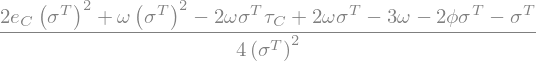

In [9]:
# Extract optimal education expenditure  
e_I_optimal = solutions[0][1]
print("Optimal education expenditure:")
display(e_I_optimal)

Optimal electoral rent:


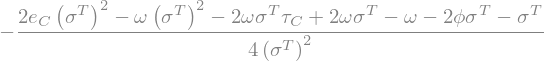

In [10]:
# Extract optimal electoral rent
R_I_optimal = solutions[0][2]
print("Optimal electoral rent:")
display(R_I_optimal)

### Step 5: Verify the Solution

Let's verify that our solutions satisfy the budget constraint.

Net tax revenue:


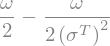


Total spending (e_I + R_I):


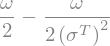


Budget constraint satisfied: True


In [11]:
# Substitute optimal values into budget constraint
net_revenue = (tau_I_optimal - Rational(1,2)*tau_I_optimal**2)*omega
total_spending = e_I_optimal + R_I_optimal

print("Net tax revenue:")
display(simplify(net_revenue))
print("\nTotal spending (e_I + R_I):")  
display(simplify(total_spending))
print("\nBudget constraint satisfied:", simplify(net_revenue - total_spending) == 0)

## Comparative Statics Analysis

### How does the incumbent respond to the challenger's education policy?

We examine $\frac{\partial e_I^*}{\partial e_C}$ to understand strategic policy interactions.

In [13]:
from IPython.display import display

# Compute how incumbent's education spending responds to challenger's education spending
response_to_challenger = diff(e_I_optimal, e_C)

print("∂e_I*/∂e_C =")
display(response_to_challenger)

print("\nInterpretation:")
if response_to_challenger == -1:
    print("• Perfect strategic substitution: each $1 increase in challenger's education")
    print("  spending leads to exactly $1 decrease in incumbent's education spending")
    print("• This suggests pure rent-seeking behavior - politicians compete by")  
    print("  differentiating their platforms rather than matching them")
else:
    print("• The response coefficient is:", response_to_challenger)

∂e_I*/∂e_C =



Interpretation:
• The response coefficient is: 1/2


### Additional Comparative Statics

Let's examine how the incumbent responds to other key parameters.

∂e_I*/∂σᵀ =


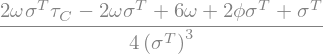


∂e_I*/∂ω =


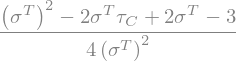


∂e_I*/∂τ_C =


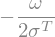

In [15]:
# Response to changes in voter preferences for education
response_to_sigma = diff(e_I_optimal, sigma_T).simplify()
print("∂e_I*/∂σᵀ =")
display(response_to_sigma)

# Response to changes in total wealth
response_to_wealth = diff(e_I_optimal, omega)  
print("\n∂e_I*/∂ω =")
display(response_to_wealth)

# Response to challenger's tax policy
response_to_tau_C = diff(e_I_optimal, tau_C)
print("\n∂e_I*/∂τ_C =")
display(response_to_tau_C)

## Appendix: Derivation of Winning Probability Function

The incumbent's winning probability comes from the voter model. Each voter type has utility:

**Young voters:** $U^y(q_{\zeta}) = (1-\tau_{\zeta})\omega + \lambda^y e_{\zeta}$
**Old voters:** $U^o(q_{\zeta}) = (1-\tau_{\zeta})\omega + \lambda^o e_{\zeta}$

The winning probability is:
$$p_I(q_I,q_C) = \frac{1}{2} + \phi + \sigma(U^y(q_I) - U^y(q_C)) + (1-\sigma)(U^o(q_I) - U^o(q_C))$$

where $\sigma = \frac{\alpha}{\alpha + (1-\alpha)\frac{\bar{c}^y}{\bar{c}^o}}$ depends on:
- $\alpha$: fraction of young voters in population
- $\bar{c}^y, \bar{c}^o$: voting cost parameters for young and old voters

### Simplifying the Utility Differences

The utility differences are:
$$U^y(q_I) - U^y(q_C) = (\tau_C-\tau_I)\omega + \lambda^y (e_I-e_C)$$
$$U^o(q_I) - U^o(q_C) = (\tau_C-\tau_I)\omega + \lambda^o (e_I-e_C)$$

Both voter types prefer lower taxes and may have different preferences for education spending.

### Final Winning Probability Expression

Substituting the utility differences:
\begin{align}
p_I(q_I,q_C) &= \frac{1}{2} + \phi + \sigma[(\tau_C-\tau_I)\omega + \lambda^y (e_I-e_C)] \\
&\quad + (1-\sigma)[(\tau_C-\tau_I)\omega + \lambda^o (e_I-e_C)] \\
&= \frac{1}{2} + \phi + (\tau_C-\tau_I)\omega + (e_I-e_C)[\sigma\lambda^y + (1-\sigma)\lambda^o] \\
&= \frac{1}{2} + \phi + (\tau_C-\tau_I)\omega + (e_I-e_C)\sigma^T
\end{align}

where $\sigma^T = \sigma\lambda^y + (1-\sigma)\lambda^o$ is the population-weighted marginal benefit from education.